# `trim_floating_solid`

``trim_floating_solid`` function is a filter which removes solids not attached to primary solid structure.

In [15]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

ps.visualization.set_mpl_style()

## `im`
How floating solids are removed and the result can depend on whether the image is 2D or 3D so here we investigate both cases.  The 2D and 3D images are visualized but only a slice of the 3D image is shown.

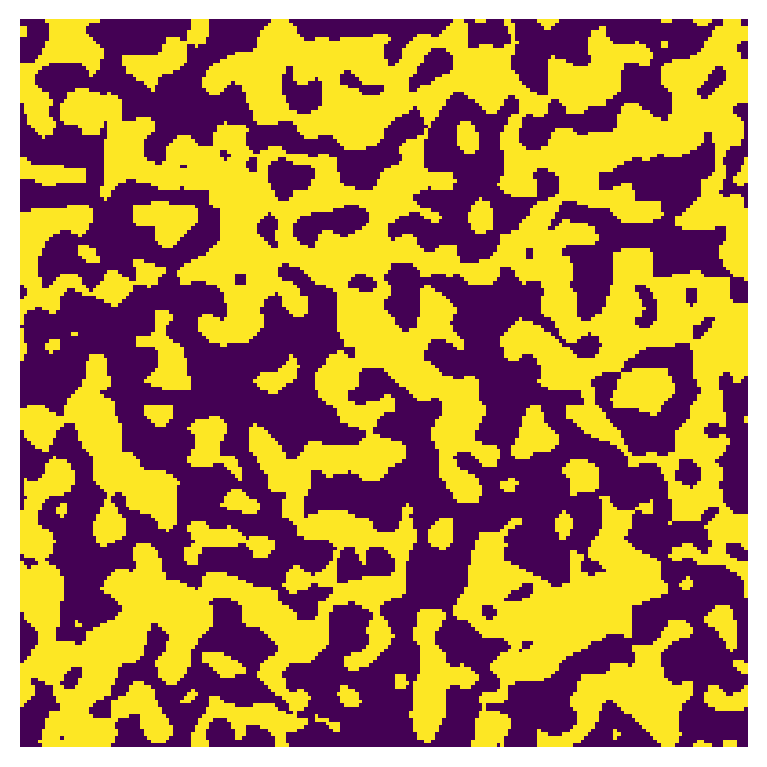

In [16]:
im = ps.generators.blobs(shape=[200, 200], porosity=0.49, blobiness=2, seed=1)

fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im)
ax.axis(False);

## `conn`
Controls how 'connected' a group of voxels must be.  The options are `'min'` which means voxels are only considered connected if they share a face, and `'max'` which means voxels are connected if they share a face, edge or corner. 

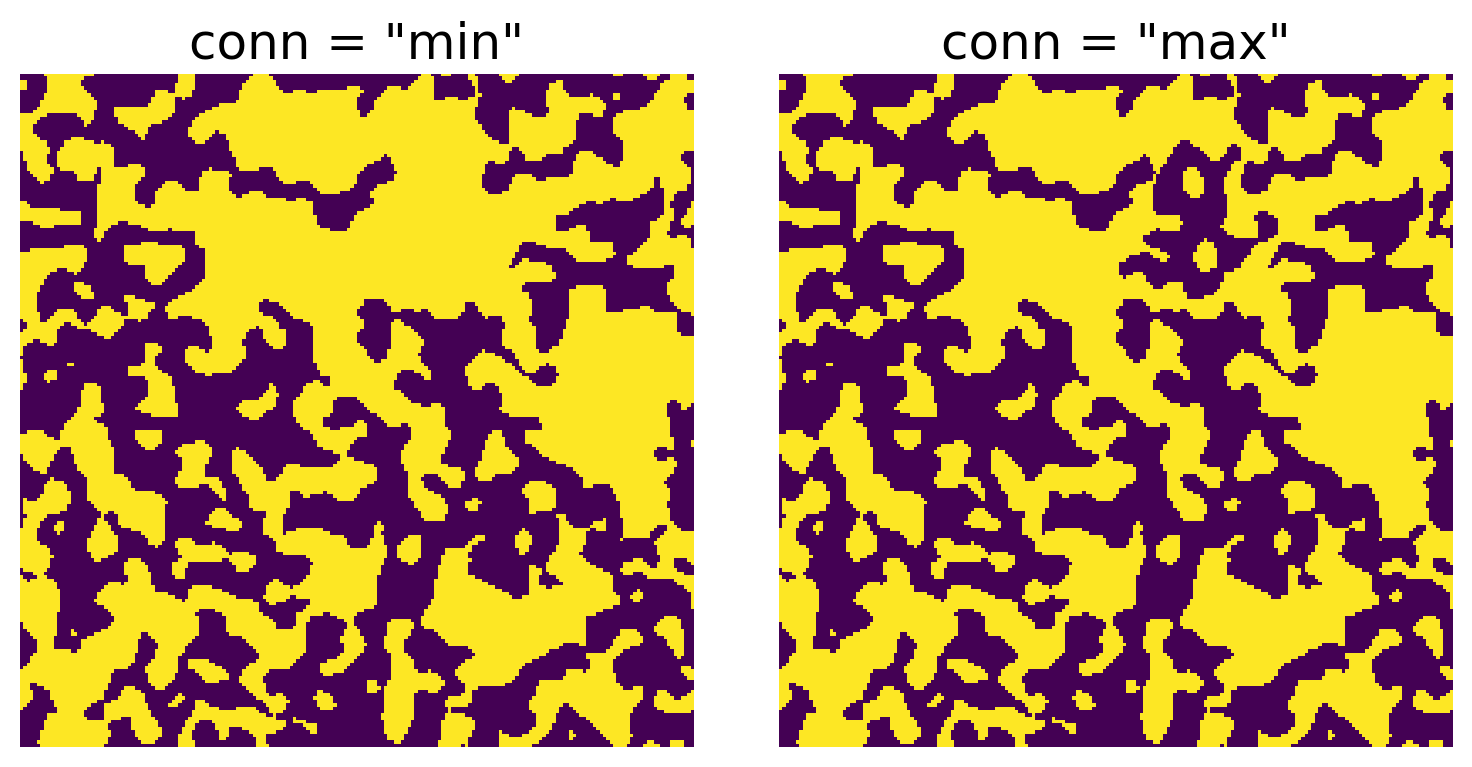

In [17]:
x1 = ps.filters.trim_floating_solid(im=im, conn="min")
x2 = ps.filters.trim_floating_solid(im=im, conn="max")

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(x1)
ax[0].axis(False)
ax[0].set_title('conn = "min"', fontdict={"fontsize": 18})
ax[1].imshow(x2)
ax[1].axis(False)
ax[1].set_title('conn = "max"', fontdict={"fontsize": 18});

There is one cluster of solid voxels (purple) in the upper right corner which is removed when `conn='min'`, but survives when `conn='max'`.